In [1]:
from PIL import Image, ImageDraw, ImageFont
main_img_size = 28, 28
H, W = 28, 28
digit = []
for i in range(0,10):
    txt = str(i)
    # create an image
    out = Image.new("1", main_img_size, color = "black")
    
    # get a font
    fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 30)
    # get a drawing context
    d = ImageDraw.Draw(out)

    w, h = d.textsize(txt, font=fnt)
    # draw multiline text
    d.text(((W-w)/2, (H-h)/2), txt, font=fnt, fill="white")
    digit.append(out)
    #out.save('pil_text{}.png'.format(i))
    #out.show()

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt

2022-09-08 14:47:27.355233: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-08 14:47:27.357831: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-08 14:47:27.357838: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(x_train,Y_train), (x_test, Y_test) = mnist.load_data()
print(x_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#print(digit[0].shape)
for i in range(0,10):
    digit[i] = np.asarray(digit[i])
    #print(type(digit[i]))

In [5]:
y_train = np.empty_like(x_train)
y_test = np.empty_like(x_test)
for i in range(len(Y_train)):
    temp = int(Y_train[i])
    y_train[i] = digit[temp]
for i in range(len(Y_test)):
    temp = int(Y_test[i])
    y_test[i] = digit[temp]

In [6]:
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

x_test /= 255
x_train /= 255
y_train /=255
y_test /=255

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
y_train = y_train.reshape(y_train.shape[0], 28, 28, 1)
y_test = y_test.reshape(y_test.shape[0], 28, 28, 1)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [56]:
input_img = layers.Input(shape=(28,28,1), name='Input_stage')
# x = layers.Flatten()(input_img)
# x = layers.Dense(784, activation='relu')(x)
# x = layers.Reshape((28,28,1))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', strides=2)(input_img)
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', strides=2)(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(10, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dense(1152, activation='relu')(x)
x = layers.Reshape((3, 3, 128))(x)
x = layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='relu')(x)
x = layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='relu', padding='same')(x)
output = layers.Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=2, activation='relu', padding='same')(x)
# x = layers.Flatten()(x)
# x = layers.Dense(784, activation='relu')(x)
# output = layers.Reshape((28,28,1))(x)


model = keras.Model(inputs = input_img, outputs = output)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_stage (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_22 (Dense)            (None, 2048)              2361344   
                                                                 
 dense_23 (Dense)            (None, 1024)              2098

In [57]:
model.compile(loss='binary_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"],
             )

In [58]:
# steps_per_epochs=10
history = model.fit(x_train, y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0021 - accuracy: 0.9295
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0019 - accuracy: 0.9295
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0019 - accuracy: 0.9295
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0019 - accuracy: 0.9295
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0018 - accuracy: 0.9295


In [59]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0018 - accuracy: 0.9295


[0.0018339342204853892, 0.9294621348381042]

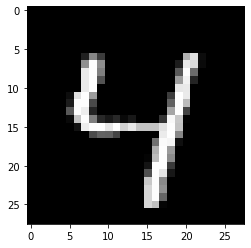

In [80]:
image_index = 210 # 4444
test_image = x_test[image_index].reshape(28, 28)
plt.imshow(test_image, cmap='gray')

1/1 [==============================] - 0s 14ms/step


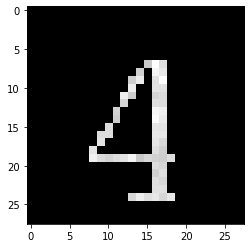

In [81]:
test_image = test_image.reshape(1, 28, 28, 1) # make image batch

pred = model.predict(test_image)       # prediction

pred = pred.reshape(28,28)
plt.imshow(pred, cmap= 'gray')

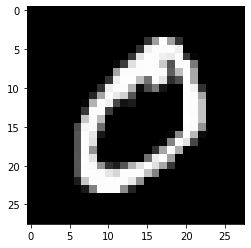

In [14]:
test_image = x_train[1].reshape(28, 28)
plt.imshow(test_image, cmap='gray')

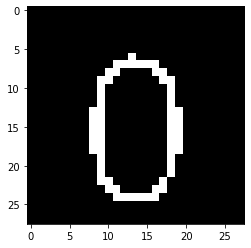

In [15]:
image_index = 0 # 4444
test_image = y_train[1].reshape(28, 28)
plt.imshow(test_image, cmap='gray')